<p><a href="http://web.uam.es/personal_pdi/ciencias/pangulo/doc/laboratorio/bloqueV.html" target="_blank">Consulta avanzada</a></p>
<h4>L&iacute;mites de funciones o de sucesiones</h4>
<p>El m&eacute;todo o funci&oacute;n <span style="font-family: courier new,courier;">limit</span>.</p>

In [1]:
f1(x)=sin(x)/x
f2(x)=sin(x)/x^2
f1(x).limit(x=0), f2(x).limit(x=0), f2(x).limit(x=0,dir='-'), f2(x).limit(x=0,dir='right')

(1, Infinity, -Infinity, +Infinity)

In [2]:
f3=x*sin(x)
f4=x*(5+sin(x))
limit(f3,x=oo), limit(f3,x=+infinity), f4.limit(x=+Infinity)

(und, und, und)

In [3]:
var('n')
a(n)=sqrt(n^2+3)/n^(3/2)
limit(a(n),n=+oo)

0

<h4>Suma (simb&oacute;lica) de series</h4>
<p>Utilizamos la funci&oacute;n <span style="font-family: courier new,courier;">sum </span>con la sintaxis</p>
<p><span style="font-family: courier new,courier;">sum(expresion, indice, valor inicial, valor final)</span></p>
<p>en la que el valor final puede ser <span style="font-family: courier new,courier;">+Infinity</span> (o el valor inicial <span style="font-family: courier new,courier;">-Infinity</span>).</p>
<p>El resultado puede ser simb&oacute;lico, como el que sigue:</p>

In [4]:
var('k')
sum(1/k^2, k, 1, +oo)

1/6*pi^2

In [5]:
sum(1/k^3, k, 1, +oo)

zeta(3)

In [6]:
sum(1/(k^2+k),k,1,100)

100/101

<p>Restricciones sobre los par&aacute;metros: la funci&oacute;n <span style="font-family: courier new,courier;">assume. </span>Se utiliza <span style="font-family: courier new,courier;">forget</span> sin argumentos para borrar cualquier hip&oacute;tesis anterior.</p>

In [7]:
var('a n')
sum(a^n, n, 1, +oo)

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(abs(a)-1>0)', see `assume?` for more details)
Is abs(a)-1 positive, negative or zero?

In [8]:
var('a n')
forget()
assume(abs(a)<1)
sum(a^n, n, 1, +oo)

-a/(a - 1)

In [9]:
var('a n')
sum(a^n, n, 1, +oo)

-a/(a - 1)

Las dos celdas que siguen son esencialmente equivalentes: tardan lo mismo y producen el mismo resultado. No siempre es así, y, en ocasiones, la segunda puede tardar menos en ejecutarse. 

In [12]:
%time
var('k')
Suma1=sum(1/k,k,1,10000)
sum1 = Suma1.n(16)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


In [13]:
%time
Suma2=0
for j in range(1,10001):
    Suma2+=1/j
sum2 = Suma2.n(16)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


In [14]:
sum1 == sum2

True

<h4>Derivadas</h4>
<p>Utilizamos indistintamente <span style="font-family: courier new,courier;">differentiate</span>, <span style="font-family: courier new,courier;">diff</span>, <span style="font-family: courier new,courier;">derivative</span>. Las tres funcionan como m&eacute;todos, las dos &uacute;ltimas tambi&eacute;n se pueden utilizar como funciones.</p>

In [15]:
fsen(x)=sin(x)

In [16]:
fsen(x).derivative(),fsen(x).diff(),fsen(x).differentiate(),derivative(fsen(x)),diff(fsen(x))

(cos(x), cos(x), cos(x), cos(x), cos(x))

In [17]:
fsen.derivative(),fsen.diff(),fsen.differentiate(),derivative(fsen),diff(fsen)

(x |--> cos(x), x |--> cos(x), x |--> cos(x), x |--> cos(x), x |--> cos(x))

<p>Derivadas de orden superior:</p>

In [18]:
fsen(x).derivative(0),fsen(x).derivative(),fsen(x).derivative(2),fsen(x).derivative(3),fsen(x).derivative(4)

(sin(x), cos(x), -sin(x), -cos(x), sin(x))

<p>Se pueden utilizar con funciones de varias variables para calcular derivadas parciales</p>

In [19]:
F(x,y)=x^3*sin(2*y)+y^2*cos(3*x)

In [20]:
F(x,y).diff(x),F(x,y).diff(y)

(-3*y^2*sin(3*x) + 3*x^2*sin(2*y), 2*x^3*cos(2*y) + 2*y*cos(3*x))

In [21]:
F(x,y).diff(x,y),F(x,y).diff(y,x)

(6*x^2*cos(2*y) - 6*y*sin(3*x), 6*x^2*cos(2*y) - 6*y*sin(3*x))

<p>Se puede indicar el n&uacute;mero de veces que se deriva respecto de cada variable:</p>

In [22]:
F(x,y).diff(x,2,y,3)

-48*x*cos(2*y)

<h4>Ejercicios</h4>
<p>Hallar:</p>
<p>$$\text{(a)}\quad \frac{d}{dx}\sin(\log x)\qquad\text{(b)}\quad\frac{d}{dx}\arcsin\sqrt{x^2-1}\qquad\text{(c)}\quad\frac{d}{dx}\tan(x^2+\log x+\arctan x)\qquad\text{(d)}\quad\frac{d}{dx}x^{\log x}$$</p>

<h4>C&aacute;lculo integral</h4>
<p>Para calcular la primitiva de una funci&oacute;n definida simb&oacute;licamente podemos utilizar los m&eacute;todos (o funciones) <span style="font-family: courier new,courier;">integral</span> o <span style="font-family: courier new,courier;">integrate</span>. El resultado es <em><span style="color: #ff0000;">una</span></em> sola primitiva; no se indica que el resultado es "salvo constante aditiva".</p>

In [23]:
f1(x)=sin(x)^2
print f1.integral(x)
print f1.integrate(x)
print integrate(f1,x)
print integral(f1,x)

x |--> 1/2*x - 1/4*sin(2*x)
x |--> 1/2*x - 1/4*sin(2*x)
x |--> 1/2*x - 1/4*sin(2*x)
x |--> 1/2*x - 1/4*sin(2*x)


<p>Observese que efectivamente el programa elige <em><span style="color: #ff0000;">una</span></em> primitiva, ya que al evaluarla se obtiene un valor num&eacute;rico.</p>

In [24]:
f2(x)=(x^(3/5)+x^(1/6))/sqrt(x)
f2i=f2.integral(x)
show(f2i)
f2i(1)

x |--> 10/11*x^(11/10) + 3/2*x^(2/3)

53/22

<p>El c&aacute;lculo de una integral definida se obtiene dando los extremos del intervalo de integraci&oacute;n al m&eacute;todo (o funci&oacute;n), pero nos da el valor simb&oacute;lico.</p>

In [25]:
f4(x)=sin(2*x)*cos(5*x)
f4.integrate(x,0,1)

-1/14*cos(7) + 1/6*cos(3) - 2/21

<p>Para obtener la aproximaci&oacute;n num&eacute;rica, tenemos que pedirla</p>

In [26]:
f4.integrate(x,0,1).n()

-0.314087005696025

In [27]:
integral(sin(x)^2,x,0,pi/5), integral(sin(x)^2,x,0,pi/5).n()

(1/10*pi - 1/16*sqrt(2*sqrt(5) + 10), 0.0763951362851909)

<h4>Serie de Taylor</h4>
<h4></h4>

In [28]:
f(x)=(1-cos(x))/x^2

In [29]:
taylor(f,x,0,5)

x |--> 1/720*x^4 - 1/24*x^2 + 1/2

In [27]:
taylor(f,x,0,10)

x |--> -1/479001600*x^10 + 1/3628800*x^8 - 1/40320*x^6 + 1/720*x^4 - 1/24*x^2 + 1/2

<p>Como la funci&oacute;n $f$ es par ($f(x)=f(-x)$ para todo $x$) en su desarrollo de taylor s&oacute;lo aparecen exponentes pares. Nos preguntamos si es cierto que $f(x)\le \frac{1}{2}$ para todo $x$:</p>

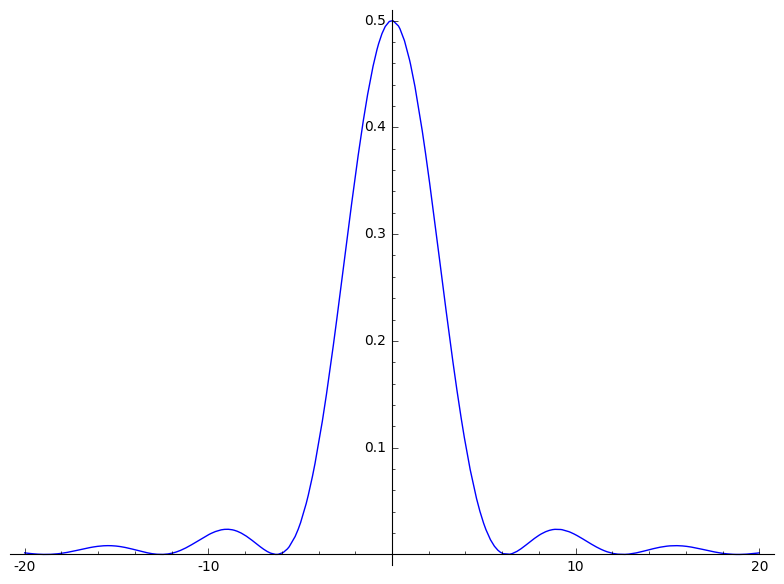

In [30]:
plot(f,-20,20)

<p>Como la funci&oacute;n es par s&oacute;lo debemos ocuparnos del semieje $x\ge 0$. Es claro que la funci&oacute;n se anula para $x=\pm 2\pi$ y para $|x|\ge 2\pi$ no hay gran problema porque el numerador est&aacute; acotado por $1$ y el denominador es suficientemente grande. Debemos estudiar la funci&oacute;n $f$ en el intervalo $[-2\pi,2\pi]$ (o $[0,2\pi]$).</p>
<p>De hecho, para $|x|\ge\sqrt{2}$, por la misma raz&oacute;n,&nbsp; ya es imposible que $f(x)$ sea mayor que $1/2$. Nos queda el intervalo $[0,\sqrt{2}]$), y bastar&iacute;a, por ejemplo, demostrar que $f(x)$ es decreciente en todo el intervalo viendo que su derivada es negativa en todo el intervalo. &iquest;C&oacute;mo podemos usar Sage para ayudarnos a hacer esto?</p>

<h4>Gr&aacute;ficas</h4>

In [31]:
T2 = taylor(f,x,0,2); T2

x |--> -1/24*x^2 + 1/2

In [32]:
T4 = taylor(f,x,0,4); T4

x |--> 1/720*x^4 - 1/24*x^2 + 1/2

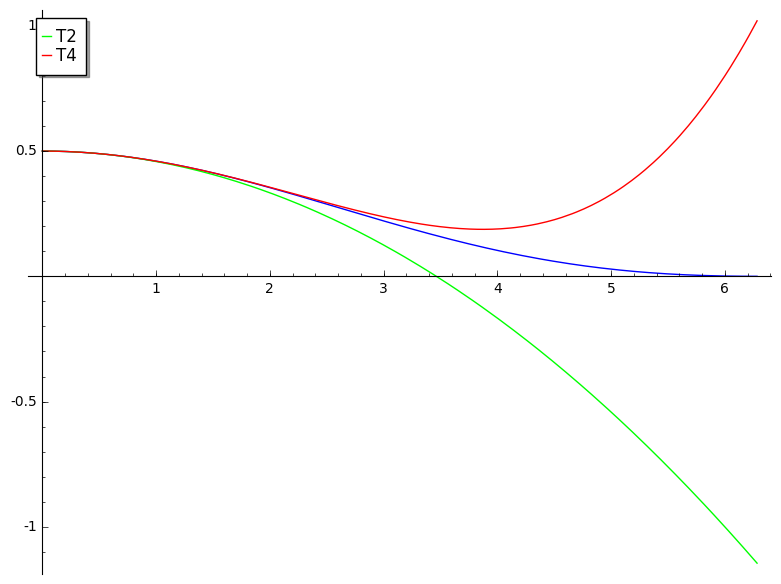

In [33]:
plot(f,0,2*pi)+plot(T2,0,2*pi,rgbcolor=(0,1,0),legend_label="T2")+plot(T4,0,2*pi,rgbcolor=(1,0,0),legend_label="T4")

<p>Vemos claramente que las aproximaciones que da el polinomio de Taylor son locales, buenas cerca del punto en el que derivamos (en este caso $x=0$) y mejoran al aumentar el grado del polinomio (el polinomio $T4$ aproxima mejor que el $T2$).</p>